In [5]:
from model import Model
from data import MNIST
import torch
import matplotlib.pyplot as plt

model = Model([1,28,28], 1000, 1e-4, 0.02)
dataset = MNIST()

model.load_model("diffusion_model")

Model loaded!


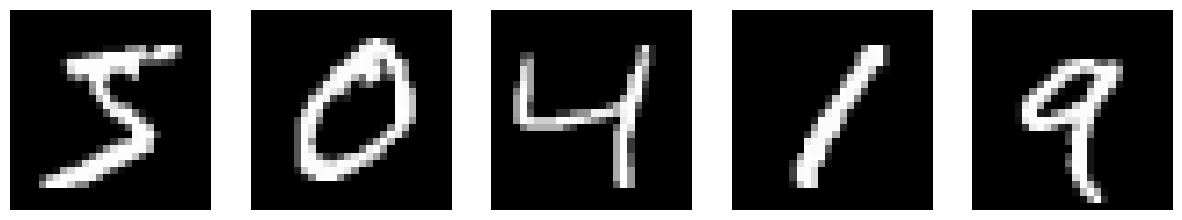

In [7]:
xs = dataset[:5]
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axs):
    ax.imshow(xs[i].reshape(28, 28), cmap='gray')
    ax.axis('off') 

In [8]:
ts = model.sample_time_steps(5)
noisy_xs, eps = model.make_noisy_image(xs, ts)

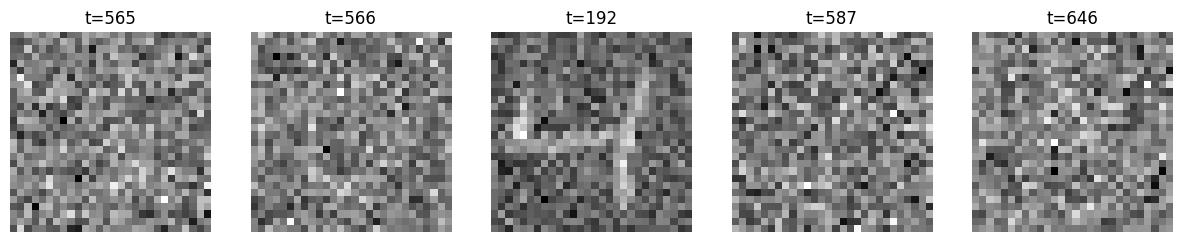

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axs):
    ax.imshow(noisy_xs[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')

In [10]:
## x_t = x_0 + noise  =>   x_0 = x_t - noise
reconstructed = noisy_xs - model.sqrt_one_minus_alpha_hat[ts].view(-1,1) * eps

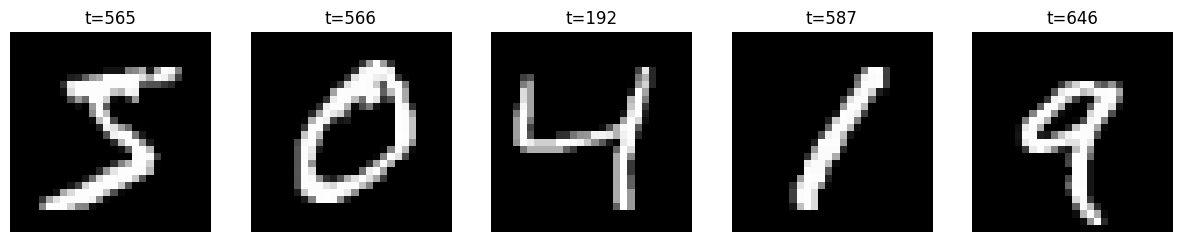

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axs):
    ax.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')